In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-16 21:02:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:800::2010, 2800:3f0:4004:801::2010, 2800:3f0:4004:808::2010, ...
Conectando-se a storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:800::2010|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 149574867 (143M) [application/zip]
Salvando em: “/tmp/horse-or-human.zip”

/tmp/horse-or-human 100%[===================>] 142,65M  4,96MB/s    em 34s     

2021-01-16 21:03:28 (4,18 MB/s) - “/tmp/horse-or-human.zip” salvo [149574867/149574867]



In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-01-16 21:03:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolvendo storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:800::2010, 2800:3f0:4004:801::2010, 2800:3f0:4004:808::2010, ...
Conectando-se a storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:800::2010|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 11480187 (11M) [application/zip]
Salvando em: “/tmp/validation-horse-or-human.zip”

/tmp/validation-hor 100%[===================>]  10,95M  2,06MB/s    em 5,8s    

2021-01-16 21:03:35 (1,89 MB/s) - “/tmp/validation-horse-or-human.zip” salvo [11480187/11480187]



In [4]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [5]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse49-7.png', 'horse23-4.png', 'horse35-7.png', 'horse21-3.png', 'horse04-1.png', 'horse43-7.png', 'horse30-4.png', 'horse09-0.png', 'horse30-9.png', 'horse41-0.png']
['human08-28.png', 'human07-19.png', 'human08-16.png', 'human12-03.png', 'human08-29.png', 'human14-03.png', 'human04-01.png', 'human15-01.png', 'human07-24.png', 'human01-09.png']
['horse4-302.png', 'horse5-065.png', 'horse4-232.png', 'horse2-412.png', 'horse2-441.png', 'horse3-026.png', 'horse4-102.png', 'horse4-468.png', 'horse3-099.png', 'horse4-188.png']
['valhuman05-14.png', 'valhuman05-00.png', 'valhuman05-10.png', 'valhuman02-14.png', 'valhuman02-12.png', 'valhuman03-23.png', 'valhuman04-08.png', 'valhuman02-08.png', 'valhuman03-18.png', 'valhuman02-24.png']


In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

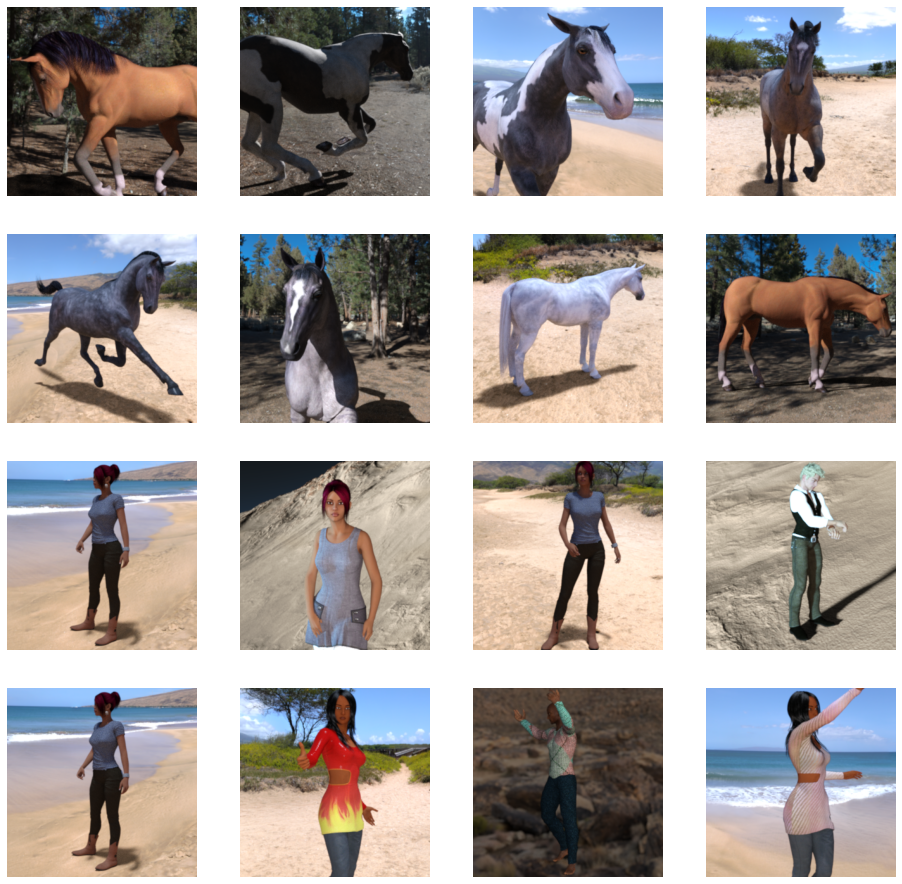

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 19600)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128, class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=8, verbose=1, validation_steps=8, validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 24s 3s/step - loss: 2.8037 - accuracy: 0.5273 - val_loss: 0.6430 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 24s 3s/step - loss: 0.5971 - accuracy: 0.7063 - val_loss: 0.7613 - val_accuracy: 0.5352
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.4631 - accuracy: 0.8387 - val_loss: 0.6200 - val_accuracy: 0.6562
Epoch 4/15
8/8 [==============================] - 21s 3s/step - loss: 0.5597 - accuracy: 0.8776 - val_loss: 1.0475 - val_accuracy: 0.6289
Epoch 5/15
8/8 [==============================] - 21s 3s/step - loss: 0.4342 - accuracy: 0.8354 - val_loss: 1.0183 - val_accuracy: 0.8320
Epoch 6/15
8/8 [==============================] - 21s 3s/step - loss: 0.1109 - accuracy: 0.9600 - val_loss: 1.4851 - val_accuracy: 0.7734
Epoch 7/15
8/8 [==============================] - 21s 3s/step - loss: 0.5868 - accuracy: 0.8154 - val_loss: 1.3789 - val_accuracy: 0.7461
Epoch 8/15
8/8 [==================